## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Applications/anaconda3/lib/python3.7/site-packages/setuptools/_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


### Load the dataset

In [2]:
main_df=pd.read_csv(r'/Users/moni/Downloads/tips.csv')
main_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
#numeric columns
num_df=main_df.select_dtypes(include=['int64','float'])
num_df.shape

(244, 3)

In [4]:
#categorical columns
cat_df= main_df.select_dtypes(include=['object'])
cat_df.shape

(244, 4)

### 2. Compute the average bill amount for each day.

In [5]:
main_df.groupby('day').mean()['total_bill'].apply(lambda x:round(x,2))

day
Fri     17.15
Sat     20.44
Sun     21.41
Thur    17.68
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [6]:
#male is more generous in giving tips

main_df.groupby('sex').sum()['tip']

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

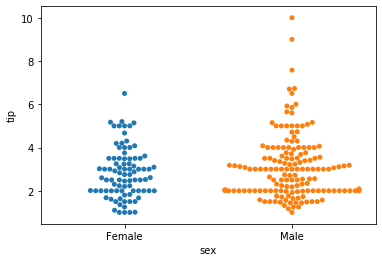

In [7]:
sns.swarmplot(x='sex',y='tip',data=main_df)

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
main_df.groupby('time')['size'].sum()
#Dinner

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
main_df['tip'].describe()
#Comment: On an average tip ranges between 1 and 10, and average is 2.99

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [10]:
main_df['day'].value_counts()
#Saturday

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

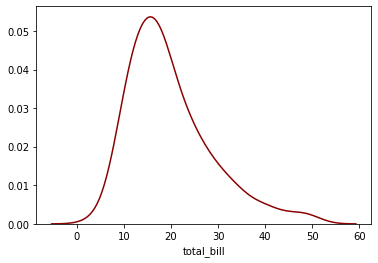

In [11]:
sns.distplot(main_df['total_bill'],
             hist=False, color='darkred',
            )
## yes skewed towards right

In [12]:
main_df['total_bill'].describe()
#mean is higher than median 

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [13]:
tips_corr=main_df[['total_bill','tip']]

In [14]:
tips_corr.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


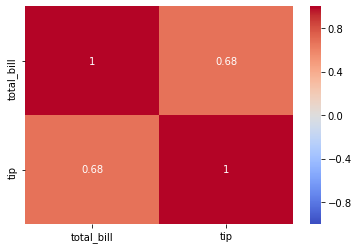

In [15]:
sns.heatmap(tips_corr.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
## total bill and tip are 0.675 correlated

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [16]:
main_df['sex'].value_counts(normalize=True)*100
#male 64.34% female 35.65%

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

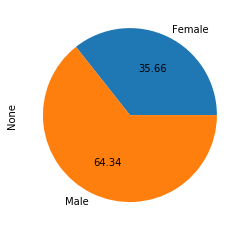

In [17]:
import matplotlib.pyplot as plt

main_df.groupby('sex').size().plot(kind='pie', autopct='%.2f')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

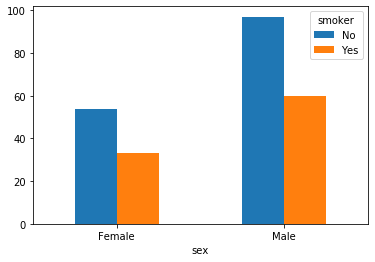

In [18]:
gender=main_df['sex']
smoker=main_df['smoker']
crosstb=pd.crosstab(gender,smoker)
barplot = crosstb.plot.bar(rot=0)

### 11. Compute the average tip amount given for different days and display it in the plot.

In [19]:
main_df.groupby('day').mean()['tip'].apply(lambda x:round(x,2))

day
Fri     2.73
Sat     2.99
Sun     3.26
Thur    2.77
Name: tip, dtype: float64

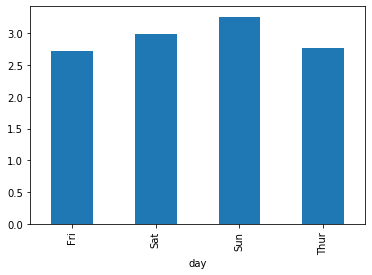

In [20]:
main_df.groupby('day').mean()['tip'].apply(lambda x:round(x,2)).plot(kind="bar")

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [22]:
bill_size_corr=main_df[['total_bill','size']]
bill_size_corr.corr()
#yes there is .59 correlation

,total_bill,size
total_bill,1.000000,0.598315
size,0.598315,1.000000


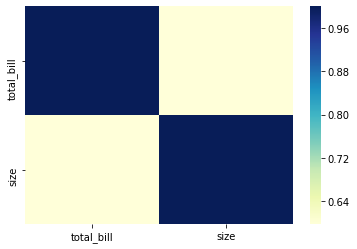

In [23]:
sns.heatmap(bill_size_corr.corr(),cmap='YlGnBu')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

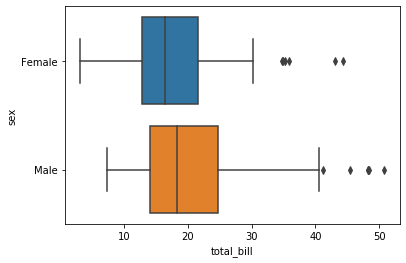

In [24]:
sns.boxplot(x='total_bill',y='sex',data=main_df)
plt.show()
#median bill for male is higher

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [25]:
main_df.loc[(main_df['day'] == 'Sat') | (main_df['day'] == 'Sun')].groupby(['time','day'])['total_bill'].max()
#there are no data points for lunch for weekends, for dinner the valyes are Sat 50.81, Sun 48.17

time    day
Dinner  Sat    50.81
        Sun    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [26]:
main_df.isnull().sum()/len(main_df)*100
#no missing value

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [27]:
len(main_df[main_df.duplicated()])

1

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

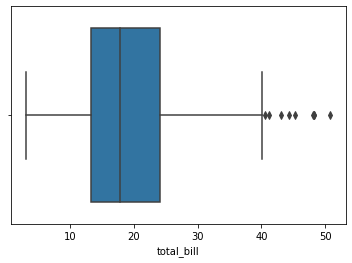

In [28]:
sns.boxplot(main_df['total_bill'])
plt.show()
#before treatment plot
#yes there are outliers

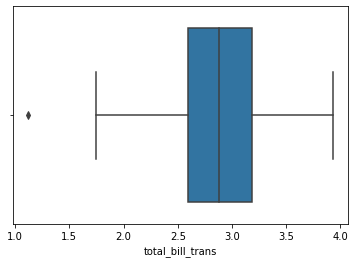

In [29]:
#after log transformation
main_df['total_bill_trans']=np.log(main_df['total_bill'])
sns.boxplot(main_df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

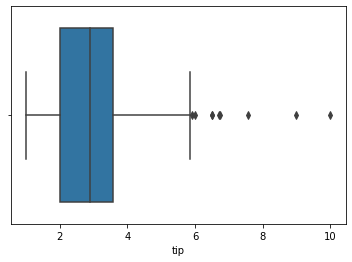

In [30]:
sns.boxplot(main_df['tip'])
plt.show()
#before treatment plot
#yes there are outliers

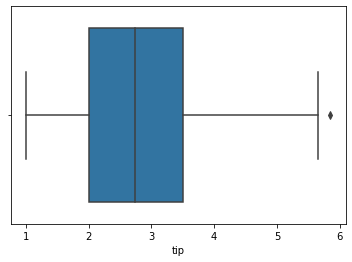

In [31]:
#outlier removal using IQR technique
Q1=main_df['tip'].quantile(0.25)
Q3=main_df['tip'].quantile(0.75)
IQR= Q3-Q1
lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)
df_out=main_df.loc[(main_df['tip']<upper_whisker)&(main_df['tip']>lower_whisker)]
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [32]:
cat_encoded_df=pd.get_dummies(main_df,drop_first=True)
cat_encoded_df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
39,31.27,5.00,3,3.442659,1,0,1,0,0,0
89,21.16,3.00,2,3.052113,1,0,0,0,1,1
124,12.48,2.52,2,2.524127,0,0,0,0,1,1
68,20.23,2.01,2,3.007167,1,0,1,0,0,0
115,17.31,3.50,2,2.851284,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [33]:
#initial range
max_val=main_df['total_bill'].max()
print('max',max_val)
min_val=main_df['total_bill'].min()
print('min',min_val)
range_bill=max_val-min_val
print('range',range_bill)


max 50.81
min 3.07
range 47.74


In [37]:

from sklearn.preprocessing import MinMaxScaler

# create an  object
min_max = MinMaxScaler()
main_df['scaled_bill'] = min_max.fit_transform(main_df[['total_bill']])
scaled_max=main_df['scaled_bill'].max()
scaled_min=main_df['scaled_bill'].min()
scaled_range=scaled_max-scaled_min
print('Scaled range',scaled_range)

Scaled range 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [46]:
tips_df=pd.read_csv(r'/Users/moni/Downloads/tips.csv')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [56]:
from sklearn.model_selection import train_test_split
#encode categiricals
tips_df=pd.get_dummies(tips_df,drop_first=True)
X = tips_df.loc[:, tips_df.columns != 'tip']
y = tips_df['tip']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#standardize
min_max = MinMaxScaler()
X_train['total_bill'] = min_max.fit_transform(X_train[['total_bill']])
X_train['size']=min_max.fit_transform(X_train[['size']])
X_test['total_bill'] = min_max.fit_transform(X_test[['total_bill']])
X_test['size']=min_max.fit_transform(X_test[['size']])
    

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [57]:
from sklearn import linear_model

In [60]:
lin_tip_model = linear_model.LinearRegression()

lin_tip_model.fit(X_train, y_train)

y_pred = lin_tip_model.predict(X_test)

r_squared=lin_tip_model.score(X_test, y_test)
print('r-squared',r_squared)


r-squared 0.4262425455186807


### Happy Learning:)